In [1]:
#imports 
import pandas as pd 
import numpy as np

## Lecture du datasets

In [2]:
xcal = pd.read_csv("Xcal.csv")
ycal = pd.read_csv("Ycal.csv")

In [3]:
xcal.shape

(203, 1154)

##### imports des librairies et chargement du jeux de donnees

In [4]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics import r2_score
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,BayesianRidge,HuberRegressor,Lasso
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn import svm
%matplotlib inline

/home/djilan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/djilan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/djilan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/djilan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [5]:
X = pd.read_csv("Xcal.csv")
y = pd.read_csv("Ycal.csv")


# Analyse exploratoire

In [6]:
y.head(5)

,V1
0,18.50
1,17.56
2,17.56
3,17.64
4,25.64


In [7]:
X.shape, y.shape

((203, 1154), (203, 1))

In [8]:
X.describe()

,3595,3603,3610,3618,3626,3633,3641,3649,3657,3664,...,12420,12428,12436,12443,12451,12459,12466,12474,12482,12490
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.108064,0.107982,0.107854,0.107662,0.107417,0.107217,0.107067,0.106962,0.106936,0.106908,...,1.377466,1.438391,1.503022,1.566871,1.612789,1.644569,1.676682,1.696548,1.714735,1.720768
std,0.011985,0.012058,0.012075,0.012023,0.011985,0.011952,0.011883,0.011853,0.011879,0.011852,...,0.072306,0.070434,0.067640,0.063444,0.060570,0.058796,0.055888,0.053719,0.051462,0.051092
min,0.082476,0.082141,0.081849,0.081283,0.080916,0.081401,0.082115,0.082225,0.081756,0.081156,...,1.067905,1.120154,1.183913,1.256383,1.313332,1.362023,1.413943,1.450315,1.489286,1.526773
25%,0.097663,0.097765,0.097620,0.097419,0.097235,0.096964,0.096705,0.096709,0.096873,0.096951,...,1.355882,1.418051,1.482590,1.549023,1.589847,1.619583,1.653740,1.672181,1.684085,1.690797
50%,0.109270,0.109802,0.108936,0.108757,0.108733,0.108950,0.108911,0.108596,0.108255,0.108283,...,1.396239,1.457322,1.520651,1.580528,1.624338,1.651085,1.682133,1.698066,1.717952,1.725514
75%,0.116485,0.116210,0.115836,0.115619,0.115171,0.115184,0.115267,0.115208,0.114988,0.115188,...,1.419501,1.477144,1.542360,1.606639,1.651954,1.687106,1.712088,1.734644,1.751495,1.756276
max,0.158515,0.159758,0.160320,0.159257,0.157773,0.156988,0.156588,0.156249,0.156246,0.156423,...,1.484998,1.538788,1.597667,1.659831,1.713083,1.754015,1.795093,1.829642,1.865208,1.885559


Visualiser la distribtion des valeurs de chaque colonne dans une graphique n'est pas possible avec la dimension actuelle. Ce tableau nous permet de conclure que la moyenne et la deviation standard sont egaux a 1e-3 pres.

In [9]:
X.isnull().sum()

3595     0
3603     0
3610     0
3618     0
3626     0
3633     0
3641     0
3649     0
3657     0
3664     0
3672     0
3680     0
3687     0
3695     0
3703     0
3711     0
3718     0
3726     0
3734     0
3741     0
3749     0
3757     0
3765     0
3772     0
3780     0
3788     0
3795     0
3803     0
3811     0
3819     0
        ..
12266    0
12274    0
12281    0
12289    0
12297    0
12304    0
12312    0
12320    0
12328    0
12335    0
12343    0
12351    0
12358    0
12366    0
12374    0
12382    0
12389    0
12397    0
12405    0
12412    0
12420    0
12428    0
12436    0
12443    0
12451    0
12459    0
12466    0
12474    0
12482    0
12490    0
Length: 1154, dtype: int64

/home/djilan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/djilan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


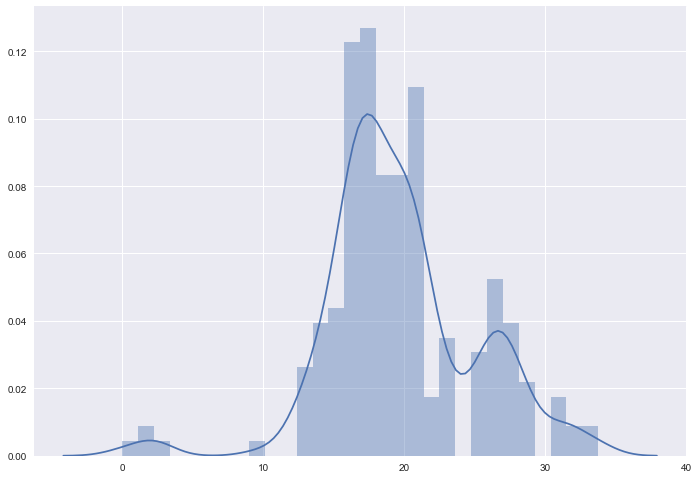

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y , bins=30)
plt.show()

Nous voyons que les valeurs de Y suivent une distribution normale avec quelques valeurs aberrantes

Le but de cette etape est de comprendre notre ensemble de donnees, et decider ensuite s'il faut changer la representation et formatage de ce dernier enfin de mieux choisir le modele adequat pour resoudre le probleme. Pour y parvenir nous allons dans un premier temps appliqué quelques algorithmes puis proceder par l'Analyse en Composant Principal (ACP) et appliqué les memes algorithmes sur le resultat de l'ACP.

## Application de quelques algorithmes sur les donnees xcal pour predire ycal

### Application de la regression lineaire sur les donnees initiales

In [11]:
X_train, X_test, y_train, y_test = train_test_split(xcal, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred.shape
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.3874014282832916e-12
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 3.25936063065912
R2 score is 0.5900619673980094


### Application d'autres algorithmes

/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was 

,R Square Score
Linear,0.523047
Hubber,0.198339
Lasso,0.147626
Bagging,0.136455
RandomForest,0.124172
AdaBoost,0.090481
Ridge,0.083191
Bayesian Ridge,0.034093
SVM Linear,-0.054660
SVM RBF,-0.078470


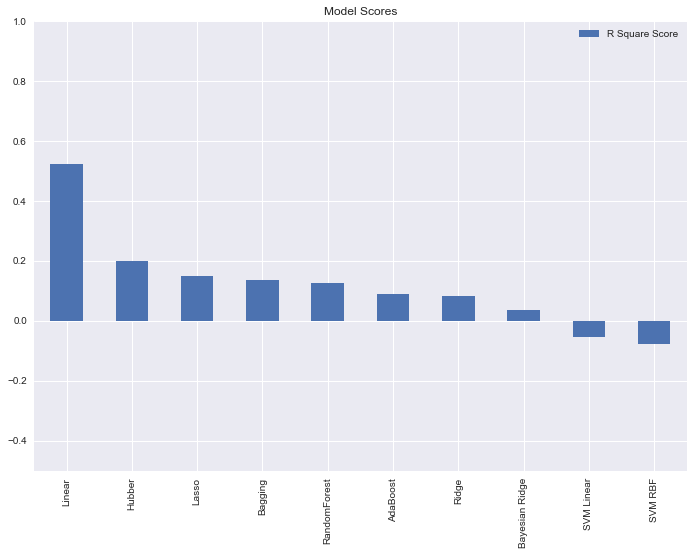

In [26]:
X_train, X_test, y_train, y_test = train_test_split(xcal, y, test_size=0.3, random_state=0)
lets_try(X_train,y_train)

Le nombre d'entree de notre ensemble de donnees est inferieur au nombre de colonne, ce qui affectera en quelques sortes la qualite des resultats. Afin d'y remedier, on peut faire une analyse en composant principal afin de reduire la dimension voir si ca nous permeter d'ameliorer la performance de nos modeles.

# Analyse en Composant Principal

### Reduction de la taille des donnees

In [14]:
pca = PCA(n_components=60, whiten = False, random_state = 2019)
X_pca = pca.fit_transform(X)
X_pca_reconst = pca.inverse_transform(X_pca)

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0.296177,-0.267972,-0.000517,0.095402,-0.047328,-0.037336,0.012925,-0.014715,0.015163,0.014768,...,-0.000068,-0.000069,-0.000267,-0.000007,1.310021e-15,4.829208e-21,6.266833e-22,8.501680e-22,4.736353e-22,7.485216e-22
1,0.477501,-0.267113,0.037474,0.107857,-0.029541,0.000028,0.009138,-0.001270,-0.007317,0.009462,...,-0.000166,0.000121,0.000107,0.000037,1.310021e-15,4.829208e-21,6.266833e-22,8.501680e-22,4.736353e-22,7.485216e-22
2,0.573909,-0.137616,0.011708,0.067780,0.006964,0.002714,0.024517,-0.008528,-0.015897,0.004428,...,-0.000040,0.000276,0.000105,-0.000091,1.310021e-15,4.829208e-21,6.266833e-22,8.501680e-22,4.736353e-22,7.485216e-22
3,0.382203,-0.236422,0.008755,0.108202,-0.042319,-0.012260,-0.011443,-0.013093,0.015450,0.006778,...,-0.000027,0.000185,0.000147,0.000054,1.310021e-15,4.829208e-21,6.266833e-22,8.501680e-22,4.736353e-22,7.485216e-22
4,0.844292,-0.220572,0.026406,0.070212,0.011319,-0.014139,0.001579,-0.015696,-0.014774,-0.006168,...,0.000094,0.000281,-0.000235,0.000263,1.310021e-15,4.829208e-21,6.266833e-22,8.501680e-22,4.736353e-22,7.485216e-22


In [16]:
x_pca.shape

(203, 203)

In [17]:
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([9.33137985e-01, 4.81749755e-02, 8.79965060e-03, 4.98233810e-03,
       2.96844885e-03, 6.81839956e-04, 3.68838741e-04, 2.27656667e-04,
       1.83996353e-04, 1.31332454e-04, 8.09280494e-05, 7.08635156e-05,
       3.99893408e-05, 3.43371694e-05, 2.23584087e-05, 1.23142460e-05,
       9.43955227e-06, 7.23976201e-06, 6.11443042e-06, 4.62563069e-06,
       2.96183142e-06, 2.63796710e-06, 2.11219610e-06, 1.97996602e-06,
       1.94420576e-06, 1.77368503e-06, 1.70825753e-06, 1.50307186e-06,
       1.48881331e-06, 1.37897507e-06, 1.33575640e-06, 1.22757440e-06,
       1.20079530e-06, 1.13469123e-06, 1.08757418e-06, 1.01485826e-06,
       9.66105831e-07, 9.23432747e-07, 8.83783639e-07, 8.30018712e-07,
       8.02214332e-07, 7.93008893e-07, 7.72800784e-07, 7.19777640e-07,
       7.05877700e-07, 6.83218761e-07, 6.70964326e-07, 6.24275212e-07,
       6.06678950e-07, 5.69230193e-07, 5.58875568e-07, 5.37422446e-07,
       5.00539681e-07, 4.94330291e-07, 4.83240807e-07, 4.68218627e-07,
      

A travers cet analyse, nous devons reduire la taille de notre de jeu en sous-ensemble de variables pour représenter le même niveau d'information dans les données, ou transformer les variables en un nouvel ensemble de variables sans perdre beaucoup d'information.

In [18]:
sum(explained_variance[:3])

0.9901126113502279

Au vu de ce qui precede, on remarque que la première composante principale représente 93,31 % de l'écart, les deuxième et troisième représentent respectivement 4,81 % et 0,87 % de l'écart. On peut dire que 93,31 + 4,81 = 98,01 % de l'information est saisie par les première, deuxième  et troisieme composantes principales. On veut souvent ne garder que les caractéristiques significatives et laisser tomber les non significatives. Une règle empirique consiste à conserver les composantes principales supérieures qui capturent la variance significative et à ignorer les petites.


In [19]:

#x_pca_axe=x_pca[]
x_pca_culumn_select=x_pca[[0,1,2]]
x_pca_culumn_select['Target']=y
x_pca_culumn_select.columns = ['PC1','PC2','PC3','Target']
x_pca_culumn_select.head()

/home/djilan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PC1,PC2,PC3,Target
0,0.296177,-0.267972,-0.000517,18.50
1,0.477501,-0.267113,0.037474,17.56
2,0.573909,-0.137616,0.011708,17.56
3,0.382203,-0.236422,0.008755,17.64
4,0.844292,-0.220572,0.026406,25.64


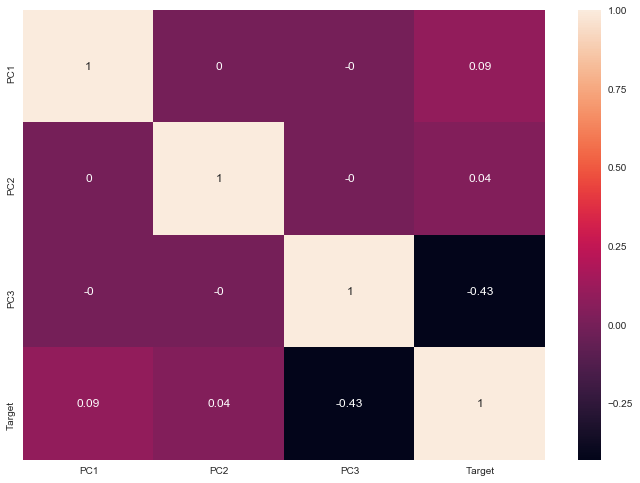

In [20]:
correlation_matrix = x_pca_culumn_select.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### On voit bien qu'il y a une correlation entre  lien linéaire entre X et Y1 d'une part, et X et Y3 d'autre part. En l'occurence, quand X augmente, en moyenne Y1 augmente aussi, et de façon linéaire (et Y3 aussi, dans une moindre mesure). On a vu au TP introductif que la faible valeur du coefficient de corrélation de Pearson entre X et Y3 est dû à une valeur aberrante (Spearman, lui, est plus robuste à cette valeur aberrante).

####  Entre X et Y2 d'une part et X et Y4 d'autre part, en revanche, le lien nous semble exister, mais ne nous semble pas linéaire, ni même monotone d'ailleurs, puisqu'à la fois les coefficients de corrélation de Pearson et de Spearman sont très faibles...


In [21]:
x_pca_culumn_select_no_target=x_pca_culumn_select.drop(['Target'], axis=1)
x_pca_culumn_select_no_target.head()

,PC1,PC2,PC3
0,0.296177,-0.267972,-0.000517
1,0.477501,-0.267113,0.037474
2,0.573909,-0.137616,0.011708
3,0.382203,-0.236422,0.008755
4,0.844292,-0.220572,0.026406


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_culumn_select_no_target, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred.shape
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.798328261606489
R2 score is 0.20766895734183866


The model performance for testing set
--------------------------------------
RMSE is 4.667216490567183
R2 score is 0.15943892612441946


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_culumn_select_no_target, y, test_size=0.3, random_state=0)

/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/djilan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,R Square Score
AdaBoost,0.155982
Lasso,0.107964
Linear,0.107943
Hubber,0.091600
Ridge,0.080220
Bagging,0.011499
RandomForest,-0.019455
Bayesian Ridge,-0.030127
SVM RBF,-0.052086
SVM Linear,-0.054404


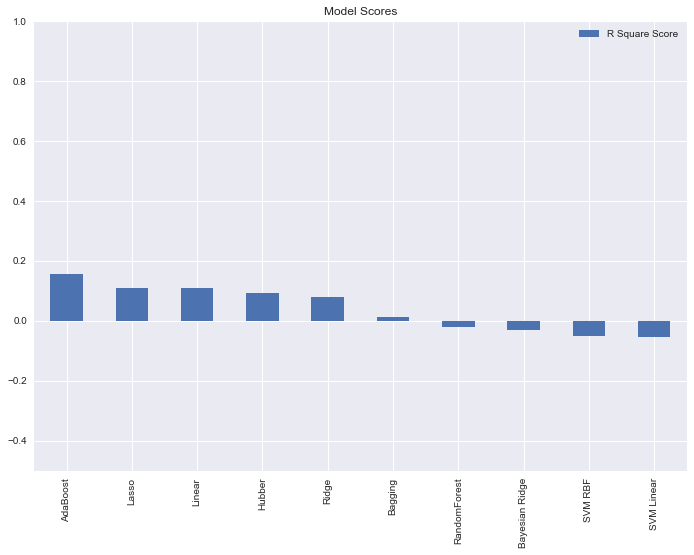

In [25]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort_values(by="R Square Score",ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([-0.5,1])
    return results

lets_try(X_train,y_train)

# Interpretations

Apres avoir essayE d'ameliorer les resultats via le pca, on constate qu'il y a ait une deterioration de la qualitE par rapport aux donnees initiales. Ceci est du au fait que par la reduction de dimension par le biais de PCA, on cherche a reduire le nombre des carcateristiques en prenant que certaines qui sont plus pertinentes et ou trouver une representation plus compacte. Mais durant notre analyse exploratoire on remarque qu'il y ait peu de difference entre les distributions de valeurs de chaque colonne. Ce qui explique nos observations apres l'experimentation (avec pca). On ne peut pas aussi se reposer sur un tres petit nombre de caracteristiques vu la dimension initiale. On peut toutefois essayer differentes approches afin d'ameliorer nos resultats tels qu'en fait une selection de caracteristiques personnalisee, etc.